<center><h1><strong>tau-data Analytics</strong></h1></center>
<center><h2><strong><font color="blue">Exploratory Data Analysis-02: Outlier dan Missing Values </font></strong></h2></center>
<img alt="" src="images/covers/Cover_EDA.png"/>

<b><center>(C) Taufik Sutanto</center>
<center><h3><font color="blue">https://taudataid.github.io/eda02/</font></h3></center>

# Outline:

* Noise & Outliers
* Missing Values dan Imputasi

In [2]:
# Importing Some Python Modules
import warnings; warnings.simplefilter('ignore')
import scipy, itertools, pandas as pd, matplotlib.pyplot as plt, seaborn as sns, numpy as np
from scipy import stats
from sklearn.preprocessing import StandardScaler, MinMaxScaler

plt.style.use('bmh'); sns.set()

# <center><font color="blue"> Beberapa Catatan Statistika Deskriptif</font></center>

* Modus tidak selalu ada
* Kapan saat yang lebih tepat menggunakan Mean atau Median (outlier-wise)
* Min/max dapat digunakan untuk mendeteksi Noise/Outlier
* Perbedaan noise dan outlier hanya dapat dilakukan lewat domain/business knowledge.
* Banyak literatur yang menyatakan outlier sebagai noise (outlier adalah subset/contoh noise).
* Outlier/noise harus "ditangani" saat preprocessing.
    
<center><img alt="" src="images/outlier vs noise.jpg" style="height: 400px;"/></center>

# <center><font color="blue"> Noisy (Big) Data</font></center>

## <font color="green"> Noise dapat terjadi karena:</font>
  - Kesalahan instrumen pengukuran: Misal di alat IoT pada saat cuaca buruk/baterai yang lemah.
  - Kesalahan input/entry
  - Transmisi yang tidak sempurna
  - inkonsistensi penamaan, dsb

<img alt="" src="images/noisy data.png" style="height: 250px;"/>

# <center><font color="blue"> Distribusi nilai pada setiap variabel kategorik</font></center>
### <font color="green"> Di module setelah ini kita akan menelaah lebih jauh lewat visualisasi</font>

* Pada tahap ini tujuan melihat distribusi variabel kategorik adalah bagian dari preprocessing/data cleaning, yaitu memeriksa apakah ada noise di variabel kategorik (biasanya typo).
* Jika variabel kategorik-nya adalah variabel target dan terjadi perbedaan proporsi yang mencolok maka tahap ini juga bermanfaat untuk mempersiapkan pemodelan imbalance learning pada tahap selanjutnya.
* Dapat dilakukan via fungsi "**value_counts**" di Pandas atau Fungsi "**Counter**" di module Collections.

In [58]:
price['Parking'].value_counts()

Open            244
Not Provided    152
Covered         114
No Parking      100
Name: Parking, dtype: int64

In [59]:
from collections import Counter

# Again: struktur data penting. Module Counter memberikan output dictionary yang biasanya lebih useful
Counter(price['Parking'])

Counter({'Not Provided': 152, 'Covered': 114, 'Open': 244, 'No Parking': 100})

# <center><font color="blue"> Apa itu Outliers (pencilan)?</font></center>

* Data yang memiliki karakteristik secara signifikan berbeda dengan kebanyakan data lainnya menurut suatu kriteria tertentu yang ditetapkan.
* Datanya seringnya valid hanya seolah-olah berasal dari suatu mekanisme berbeda.
* Bergantung konteks terkadang Outlier = Anomaly (interchangably), tapi ada beberapa literatur yang membedakan.

<img alt="" src="images/outlier definition.png" style="height: 350px;"/>

<img alt="" src="images/anomaly vs outlier.jpg" style="height: 350px;"/>
    
* https://www.senseon.io/blog/cyber-threats-evading-signatures-outlier-anomaly-or-both
* Secara statistika: jika data diasumsikan berasal dari suatu distribusi outlier adalah data-data yang memiliki probability kecil.
* Sedangkan anomaly: seolah-olah datanya berasal dari distribusi yang berbeda.
* https://www.slideshare.net/ShantanuDeosthale/outlier-analysis-and-anomaly-detection

# <center><font color="green"> Diskusi: Contoh Anomali yang bukan outlier & Contoh Outlier yang bukan Anomali?</font></center>

# <center><font color="blue"> Outliers Sering Terjadi di Big Data</font></center>
## <font color="green"> Di dunia nyata data jarang berdistribusi Normal</font>

<img alt="" src="images/outliers_socMed.jpg" style="height: 350px;"/>

# <center><font color="blue"> Outlier(s) effect on model's performace</font></center>
## <font color="green">lalu apa yang sebaiknya dilakukan ke outliers?</font>

<img alt="" src="images/outlier_effect.png" style="height: 300px;"/>
* https://medium.com/analytics-vidhya/effect-of-outliers-on-neural-networks-performance-ca1d9185dce9

# <center><font color="blue"> Berbagai Macam Algoritma untuk Mendeteksi Anomaly</font></center>

### <font color="green"> Kita akan membahas anomaly detection lebih detail di Module yang lain.</font>
* Di Module ini hanya dibahas outlier detection untuk satu variable: Melalui Confident Interval dan BoxPlot (interquantile range).
<img alt="" src="images/anomaly_detection_methods.jpg" style="height: 300px;"/>
* https://www.mdpi.com/2226-4310/6/11/117/htm

# <center><font color="blue">Asumsi kenormalan, Selang Kepercayaan, & Outlier</font></center>

<img alt="" src="images/XII_normal_CI.png" style="height: 250px;" />

* Misal Selang Kepercayaan 95% = $\bar{x}-2\sigma\leq X \leq \bar{x}+2\sigma$ diluar selang ini dianggap sebagai outlier.
* Misal Selang Kepercayaan 99% = $\bar{x}-3\sigma\leq X \leq \bar{x}+3\sigma$ diluar selang ini dianggap sebagai outlier.
* Pakai yang mana di dunia nyata?

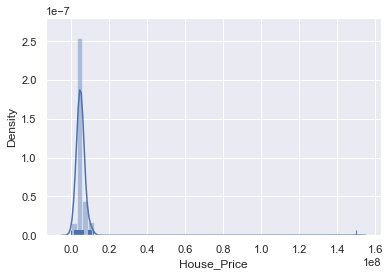

In [60]:
# Distributions, kita mulai dengan import module untuk visualisasi
import matplotlib.pyplot as plt, seaborn as sns
plt.style.use('bmh'); sns.set() #style visualisasi

p = sns.distplot(price['House_Price'], kde=True, rug=True)
#Dari plot nampak adanya outlier dengan cukup jelas.

In [61]:
# Misal dengan asumsi data berdistribusi normal & menggunakan 95% confidence interval di sekitar variabel "harga"
normal_data = abs(price.House_Price - price.House_Price.mean())<=(2*price.House_Price.std()) # mu-2s<x<mu+2s
print(normal_data.shape, type(normal_data), set(normal_data))
Counter(normal_data)

(610,) <class 'pandas.core.series.Series'> {False, True}


Counter({True: 609, False: 1})

In [62]:
price2 = price[normal_data] # Data tanpa outlier harga
print(price2.shape, price.shape)
# Perhatikan disini sengaja data yang telah di remove outliernya 
# disimpan dalam variabel baru "Price2"
# Jika datanya besar hati-hati melakukan hal ini

(609, 11) (610, 11)


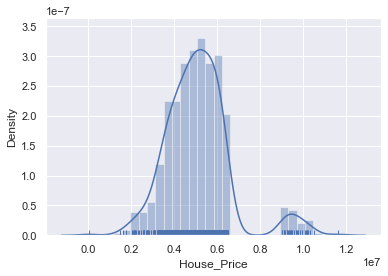

In [63]:
# Distributions
p = sns.distplot(price2['House_Price'], kde=True, rug=True)

# <center><font color="blue">Boxplot & Outlier</font></center>

<img alt="" src="images/outlier_boxplot.png" style="height: 250px;" />

* Tidak ada asumsi distribusi (normal)
* Lower Extreme kurang dari: $Q_1 - 1.5(Q_3-Q_1)$  Upper Extreme lebih dari: $Q_3 + 1.5(Q_3-Q_1)$

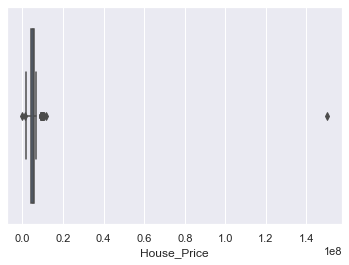

In [64]:
# Jika ada outlier grafiknya menjadi tidak jelas (data = price, bukan price2)
# Insight yang di dapat akan salah atau bahkan tidak mendapat insight sama sekali
p = sns.boxplot(x="House_Price", data=price)

In [65]:
Q1 = price['House_Price'].quantile(0.25)
Q2 = price['House_Price'].quantile(0.50)
Q3 = price['House_Price'].quantile(0.75)
IQR = Q3 - Q1 #IQR is interquartile range. 
print("Q1={}, Q3={}, IQR={}".format(Q1, Q3, IQR))

#outliers_bawah = (price['House_Price'] < (Q1 - 1.5 *IQR)) # Outlier bawah
#outliers_atas = (price['House_Price'] > (Q3 + 1.5 *IQR)) # Outlier atas
#rumah_murah = price.loc[outliers_bawah]
#rumah_kemahalan = price.loc[outliers_atas]

no_outlier = (price['House_Price'] >= Q1 - 1.5 * IQR) & (price['House_Price'] <= Q3 + 1.5 *IQR)
price3 = price[no_outlier]
print(price3.shape)
price3.head()

Q1=4157750.0, Q3=5838750.0, IQR=1681000.0
(573, 11)


,Dist_Taxi,Dist_Market,Dist_Hospital,Carpet,Builtup,Parking,City_Category,Rainfall,House_Price,total_jarak,harga_jual
1,8294.0,8186.0,12694.0,1461.0,1752.0,Not Provided,CAT B,210,3982000,29174.0,4232000
3,8301.0,11188.0,12289.0,1451.0,1748.0,Covered,CAT B,620,5373000,31778.0,5623000
4,10510.0,12629.0,13921.0,1770.0,2111.0,Not Provided,CAT B,450,4662000,37060.0,4912000
5,6665.0,5142.0,9972.0,1442.0,1733.0,Open,CAT B,760,4526000,21779.0,4776000
7,5882.0,9948.0,13315.0,1261.0,1507.0,Open,CAT C,1020,3772000,29145.0,4022000


# <center><font color="green"> Diskusi: Bilamana menggunakan CI dan bilamana menggunakan BoxPlot?</font></center>

# Noisy Data

* Noise dapat terjadi karena:
  - Kesalahan instrumen pengukuran: Misal di alat IoT pada saat cuaca buruk/baterai yang lemah.
  - Kesalahan input/entry
  - Transmisi yang tidak sempurna
  - inkonsistensi penamaan



# Outliers

* Data yang memiliki karakteristik secara signifikan berbeda dengan kebanyakan data lainnya menurut suatu kriteria tertentu yang ditetapkan.
  - Datanya valid (bukan Noise)
  - di Big Data sangat umum terjadi.
* Apa yang sebaiknya dilakukan ke outliers?

<img alt="" src="images/outliers_socMed.jpg"/>

### Univariate Outliers
* Quartiles (Boxplot)
* Asumsi Normal
* Asumsi distribusi lain

### Multivariate Outliers
* Clustering (DBSCAN)
* Isolation Forest

<p><strong>Perbandingan beberapa metode pendeteksian outliers (multivariate):</strong></p>

<ol>
	<li>&nbsp;<a href="http://scikit-learn.org/stable/auto_examples/applications/plot_outlier_detection_housing.html#sphx-glr-auto-examples-applications-plot-outlier-detection-housing-py&amp;nbsp" target="_blank">http://scikit-learn.org/stable/auto_examples/applications/plot_outlier_detection_housing.html#sphx-glr-auto-examples-applications-plot-outlier-detection-housing-py&amp;nbsp</a>;</li>
	<li><a href="http://scikit-learn.org/stable/auto_examples/covariance/plot_outlier_detection.html#sphx-glr-auto-examples-covariance-plot-outlier-detection-py" target="_blank">http://scikit-learn.org/stable/auto_examples/covariance/plot_outlier_detection.html#sphx-glr-auto-examples-covariance-plot-outlier-detection-py</a></li>
	<li><a href="http://scikit-learn.org/stable/auto_examples/neighbors/plot_lof.html#sphx-glr-auto-examples-neighbors-plot-lof-py" target="_blank">http://scikit-learn.org/stable/auto_examples/neighbors/plot_lof.html#sphx-glr-auto-examples-neighbors-plot-lof-py</a></li>
	<li><a href="http://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#sphx-glr-auto-examples-preprocessing-plot-all-scaling-py" target="_blank">http://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#sphx-glr-auto-examples-preprocessing-plot-all-scaling-py</a></li>
	<li>https://blog.dominodatalab.com/topology-and-density-based-clustering/</li>
</ol>


## Apakah ada kecenderungan perbedaan harga rumah akibat dari tipe tempat parkir?

In [3]:
file_ = 'data/price.csv'
try: # Running Locally, yakinkan "file_" berada di folder "data"
    price = pd.read_csv(file_, error_bad_lines=False, low_memory = False, encoding='utf8')
except: # Running in Google Colab
    !mkdir data
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/price.csv
    price = pd.read_csv(file_, error_bad_lines=False, low_memory = False, encoding='utf8')
    
N, P = price.shape # Ukuran Data
print('baris = ', N, ', Kolom (jumlah variabel) = ', P)
print("Tipe Variabe df = ", type(price))
price

baris =  936 , Kolom (jumlah variabel) =  10
Tipe Variabe df =  <class 'pandas.core.frame.DataFrame'>


,Observation,Dist_Taxi,Dist_Market,Dist_Hospital,Carpet,Builtup,Parking,City_Category,Rainfall,House_Price
0,1,9796.0,5250.0,10703.0,1659.0,1961.0,Open,CAT B,530,6649000
1,2,8294.0,8186.0,12694.0,1461.0,1752.0,Not Provided,CAT B,210,3982000
2,3,11001.0,14399.0,16991.0,1340.0,1609.0,Not Provided,CAT A,720,5401000
3,4,8301.0,11188.0,12289.0,1451.0,1748.0,Covered,CAT B,620,5373000
4,5,10510.0,12629.0,13921.0,1770.0,2111.0,Not Provided,CAT B,450,4662000
...,...,...,...,...,...,...,...,...,...,...
931,932,9297.0,12537.0,14418.0,1174.0,1429.0,Covered,CAT C,1110,5434000
932,933,10915.0,17486.0,15964.0,1549.0,1851.0,Not Provided,CAT C,1220,7062000
933,934,9205.0,10418.0,14496.0,1118.0,1337.0,Open,CAT A,560,7227000
934,935,10915.0,17486.0,15964.0,1549.0,1851.0,Not Provided,CAT C,1220,7062000


In [ ]:
p= sns.catplot(x="Parking", y="House_Price", data=price)
# Apa yang bisa dilihat dari hasil ini?

# Outlier atau noise? How to decide?

## Univariate Outlier removal

### Perlu asumsi "distribusi" dari datanya

# Normality Assumption

<p><img alt="" src="images/XII_normal_CI.png" style="width: 800px; height: 374px;" /></p>

In [ ]:
# Distributions
p = sns.distplot(price['House_Price'], kde=True, rug=True)

In [ ]:
# Misal dengan asumsi data berdistribusi normal
# dan menggunakan 95% confidence interval di sekitar variabel "harga"

df = np.abs(price.House_Price - price.House_Price.mean())<=(2*price.House_Price.std())
# mu-2s<x<mu+2s
print(df.shape)
df.head()

In [ ]:
price2 = price[df] # Data tanpa outliers
print(price2.shape, price.shape)
# Perhatikan disini sengaja data yang telah di remove outliernya 
# disimpan dalam variabel baru "Price2"
# Jika datanya besar hati-hati melakukan hal ini

In [ ]:
# Distributions
p = sns.distplot(price2['House_Price'], kde=True, rug=True)

In [ ]:
p= sns.catplot(x="Parking", y="House_Price", data=price2)
# Apa yang bisa dilihat dari hasil ini?

# <center><font color="blue">Missing Values</font></center>
    
Salah satu proses dalam data preprocessing adalah mengidentifikasi dan menangani *missing value*, apa itu *missing value*? *Missing value* adalah istilah untuk data yang hilang

<img alt="" src="images/dt_excel.png" style="height: 200px;" />

## <font color="green">Penyebab Missing Value</font>
*   Error pada *data entry*, baik itu *human error*, kesalahan pada sistem, atau hardware/software fault.
*   Pada data survey/kuesioner, bisa disebabkan oleh responden yang lupa mengisi pertanyaan, pertanyaan yang sulit dimengerti, ataupun pertanyaan enggan diisi karena merupakan pertanyaan yang sensitif
* permasalahan yang dihadapi pada data di dunia nyata adalah, terkadang penandaan untuk mengatakan bahwa data tersebut *missing* sangat beragam, bisa ditulis ‘?’ (tanda tanya), bisa ditulis ‘-‘ (strip), bisa suatu bilangan yang sangat besar atau sangat kecil (misal 99 atau -999), di kosongkan, NaN, dsb.
### <font color="green">Langkah pertama penanganan MV adalah dengan melakukan EDA, terutama mengetahui berapa banyak proporsi data yang Missing.</font>

# <center><font color="blue"> Tipe Missing Value</font></center>
<font color="green">Langkah kedua penanganan MV adalah meneliti bagaimana MV terdistribusi (tipe MV).</font>
<img alt="" src="images/Missing value analysis mva.jpeg" style="height: 200px;" />

* **MCAR**: Data hilang secara acak, dan tidak berkaitan dengan variabel/mekanisme apapun.
    - **Contoh**: Beberapa peserta workshop tidak hadir karena alasan masing-masing dan mereka tidak saling berkomunikasi.

* **MAR**: Terdapat hubungan sistematis antara kecenderungan data yang missing dan yang tidak missing, "tapi tidak dengan (harapan nilai) missing value itu sendiri". 
    - **Contoh**: Karena akhir tahun & banyak deadline, sehingga banyak karyawan yang memilih mengerjakan laporan ketimbang ikut workshop.

* **MNAR**: Terdapat hubungan sistematis antara kecenderungan data yang missing dan yang tidak missing, dan juga dengan (harapan nilai) missing value itu sendiri.
    - **Contoh**: Siswa yang memiliki orang tua dengan penghasilan dibawah rata-rata akan lebih sungkan mengisi form yang menanyakan penghasilan orang tua. Apalagi kalau jawabannya harus berupa angka eksak (bukan pilihan berupa interval). Pada siatuasi ini tidak hanya data berpotensi missing, tapi juga berpotensi untuk menurunkan kualitas data (siswa berbohong).
* **Statistic Test**: Terdapat uji statistik untuk MNAR, namun bahasan ini diluar scope workshop (pendahuluan). Namun MNAR juga dapat diketahui dari domain/business knowledge. https://towardsdatascience.com/statistical-test-for-mcar-in-python-9fb617a76eac
    
### <font color="green">Langkah ketiga adalah menangani MV.</font>

# <center><font color="blue"> Missing Values Treatment 01: Deletion</font></center>

* Jika data yang missing sedikit "dan" tidak terlalu berharga, biasanya relatif aman untuk tidak mengikutsertakan data tersebut dalam proses pengolahan data selanjutnya.
* Jika suatu variabel memiliki terlalu banyak missing value, secara umum juga aman untuk tidak mengikutsertakan data tersebut dalam proses pengolahan data selanjutnya.
* Terdapat beberapa cara dalam menghapus data:
    - **Listwise Deletion**: menghapus baris/record yang mempunyai satu atau lebih *missing* di suatu variabelnya.

<img alt="" src="images/mv_all.png" style="height: 150px;"/>

    - **Pairwise Deletion**: menghapus *missing value* dengan memperhatikan variabel-variabel yang ingin digunakan. misal kita ingin mencari korelasi antara **variabel A** dan **variabel B**, maka kita hanya perlu menghapus baris yang bersesuaian tersebut.

<img alt="" src="images/mv_part.png" style="height: 150px;"/>

# <center><font color="blue"> Missing Values Treatment 02: Mengabaikan missing value</font></center>

* Beberapa algoritma machine learning atau metode analisis lainnya memiliki kemampuan internal model/algoritma untuk  menangani missing value, contohnya adalah decision tree, k-Nearest Neighbors (k-NN), Neural network yang dapat mengimputasi sendiri missing value pada data.

* Ataupun jika ada beberapa kolom yang tidak memberikan informasi apa apa, kita dapat membiarkan missing value ada di kolom tersebut karena kolom tersebut pun tidak memberikan informasi yang signifikan, contohnya adalah nomor tiket pada data penerbangan, kita tidak perlu sulit-sulit memikirkan bagaimana cara mengimputasi kolom tersebut. Cukup drop kolom tersebut.

# <center><font color="blue"> Missing Values Treatment 03: Imputasi</font></center>

<img alt="" src="images/mv_flowchart.png" style="height: 400px;" />
* Selain yang ada di gambar masih banyak teknik lain, termasuk menggunakan model/algoritma untuk melakukan prediksi pada kolom yang tidak memiliki nilai (missing).
    
Sumber gambar : https://towardsdatascience.com/how-to-handle-missing-data-8646b18db0d4    

# <center><font color="blue"> Pandas & Missing Value Treatments</font></center>

* MVA sangat dalam, pada module ini hanya akan dibahas teknik sederhana.
* tidak ada metode yang terbaik dalam menghandle missing value, biasanya "case-by-case".
* Di Module ini kita akan menggunakan beberapa fungsi di Pandas untuk menangani missing values.
* https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html
* Nilai-nilai berikut dianggap missing oleh Pandas. Apa konsekuensinya?
    
<img alt="" src="images/pd_nulls.png" style="height: 150px;"/>

In [70]:
# General Look at the Missing Values
print(price2.isnull().sum())

Dist_Taxi         7
Dist_Market       7
Dist_Hospital     1
Carpet            6
Builtup          11
Parking           0
City_Category     0
Rainfall          0
House_Price       0
total_jarak       7
harga_jual        0
dtype: int64


In [71]:
(price2.isnull().sum()/len(price2)*100).to_frame('persentase missing')

,persentase missing
Dist_Taxi,1.149425
Dist_Market,1.149425
Dist_Hospital,0.164204
Carpet,0.985222
Builtup,1.806240
Parking,0.000000
City_Category,0.000000
Rainfall,0.000000
House_Price,0.000000
total_jarak,1.149425


# <center><font color="blue"> Gambaran yang Lebih baik tentang MV <br>(terutama di Big Data)</font></center>

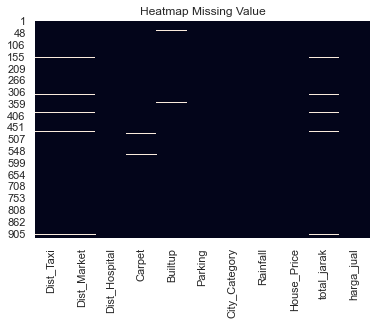

In [72]:
sns.heatmap(price2.isnull(), cbar=False)
plt.title('Heatmap Missing Value')
plt.show()

In [73]:
# Simplest solution, if the MV is not a lot
# drop rows with missing values : Ada berbagai cara
X = price.dropna() # jika ada MV minimal satu di salah satu kolom, maka baris di hapus
price2.dropna(how='all') # jika ada MV di semua kolom, maka baris di hapus
price2.dropna(thresh=2) # jika ada MV minimal di salah 2 kolom, maka baris di hapus
price2.dropna(subset=['Dist_Hospital'])[:7] # jika ada MV minimal satu di salah kolom Dist_Hospital
# inplace=True if really really sure
price2.dropna(inplace=True)

In [74]:
# memeriksa apakah Missing value-nya sudah tidak ada.
print(price2.isnull().sum())

Dist_Taxi        0
Dist_Market      0
Dist_Hospital    0
Carpet           0
Builtup          0
Parking          0
City_Category    0
Rainfall         0
House_Price      0
total_jarak      0
harga_jual       0
dtype: int64


In [75]:
import numpy as np

np.nan

nan

# <center><font color="blue"> Teknik Imputasi Dasar Missing Values</font></center>

In [76]:
# Sebagai ilustrasi Kita akan menggunakan variabel "Price" (bukan Price2)
print(price.isnull().sum())

Dist_Taxi         7
Dist_Market       7
Dist_Hospital     1
Carpet            6
Builtup          11
Parking           0
City_Category     0
Rainfall          0
House_Price       0
total_jarak       7
harga_jual        0
dtype: int64


In [77]:
# Misal di imputasi dengan rata-rata
price["Dist_Taxi"].fillna(price["Dist_Taxi"].mean(), inplace = True)
print(price.isnull().sum())

Dist_Taxi         0
Dist_Market       7
Dist_Hospital     1
Carpet            6
Builtup          11
Parking           0
City_Category     0
Rainfall          0
House_Price       0
total_jarak       7
harga_jual        0
dtype: int64


In [78]:
# Misal MV di var kategori di imputasi dengan modus
price['Parking'].fillna(price['Parking'].mode()[0], inplace=True)
print(price.isnull().sum()) 
# tapi di contoh data ini di var kategori tidak ada MV

Dist_Taxi         0
Dist_Market       7
Dist_Hospital     1
Carpet            6
Builtup          11
Parking           0
City_Category     0
Rainfall          0
House_Price       0
total_jarak       7
harga_jual        0
dtype: int64


# <center><font color="green"> Diskusi/Latihan: Bagaimana cara imputasi MV numerik dengan Median?</font></center>

# Missing Values


Salah satu proses dalam ‘membersihkan data’ itu adalah mengidentifikasi dan menghandle *missing value*, apa itu *missing value*? *Missing value* adalah istilah untuk data yang hilang


## Penyebab Missing Value
Data yang hilang ini bisa disebabkan oleh beberapa hal, salah satu contohnya adalah

*   Error pada *data entry*, baik itu *human error* ataupun kesalahan pada sistem
*   Pada data survey, bisa disebabkan oleh responden yang lupa mengisi pertanyaan, pertanyaan yang sulit dimengerti, ataupun pertanyaan enggan diisi karena merupakan pertanyaan yang sensitif


# Bagaimana cara mendeteksi *Missing Value*?

Biasanya untuk menandakan bahwa suatu data hilang, cell tersebut dibiarkan kosong

Nah, permasalahan yang dihadapi pada data di lapangan adalah, penandaan untuk mengatakan bahwa data tersebut *missing* sangat beragam, bisa ditulis ‘?’ (tanda tanya), bisa ditulis ‘-‘ (strip), bisa suatu bilangan yang sangat besar atau sangat kecil (misal 99 atau -999)

Sebagai ilustrasi, perhatikan berikut ini:
<img alt="" src="images/dt_excel.png"/>

Perhatikan bahwa data ini memiliki berbagai macam cara untuk mengatakan bahwa data pada *cell* tertentu adalah *missing*, misalnya:

*   *cell*nya dikosongkan
*   ditulis dengan n/a, NA, na, ataupun NaN
*   ditulis dengan symbol –
*   ataupun mempunyai nilai yang cukup aneh seperti nilai 12 pada kolom OWN_OCCUPIED, ataupun HURLEY pada kolom NUM_BATH

Ketika kita meng-load data ini ke python menggunakan pandas, beberapa notasi *missing* yang umum [otomatis](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) dikategorikan sebagai NaN (notasi *missing value* pada python)

<img alt="" src="images/pd_nulls.png"/>

# Tipe Missing Value

### Missing completely at random (MCAR)

Data hilang secara acak, dan tidak berkaitan dengan variabel tertentu <br><br>

### Missing at random (MAR)

Data di suatu variabel hilang hanya berkaitan dengan variabel respon/pengamatan. Sebagai contoh, orang yang memiliki rasa was-was tinggi (x) cenderung tidak melaporkan pendapatan (y) mereka, walaupun missing value bergantung pada berapa nilai x, tapi seberapa besar nilai y yang missing tersebut masih tetap acak <br><br>

### Missing not at random (MNAR)

Data di suatu variabel y berkaitan dengan variabel itu sendiri, tidak terdistribusi secara acak. Sebagai contoh, orang yang pendapatannya rendah cenderung tidak melaporkan pendapatannya. Tipe *missing value* ini yang relatif paling sulit untuk di handle

---
<br>
Pada MCAR dan MAR, kita boleh menghilangkan data dengan *missing value* ataupun mengimputasinya. Namun pada kasus MNAR, menghilangkan data dengan *missing value* akan menghasilkan bias pada data. mengimputasinya pun tidak selalu memberikan hasil yang baik


#  Menangani *Missing Value*

Setelah kita mengenali apa itu *missing value*, bagaimana biasanya *missing value* itu ditulis, dan juga apa saja tipe *missing value*. Sekarang akan dijelaskan bagaimana cara menghandle *missing value*

<img alt="" src="images/mv_flowchart.png" />

### sumber gambar : https://towardsdatascience.com/how-to-handle-missing-data-8646b18db0d4

Perlu dicatat bahwa, **tidak ada metode yang benar benar terbaik dalam menghandle missing value**, metode yang dapat digunakan akan bergantung pada tipe data dan masalah yang ditelaah

## Menghindari data dengan *missing value*
yaitu drop data / menghapus data yang mengandung *missing value* ataupun menghapus variabel yang memiliki banyak sekali *missing value*

Cara menghapus data inipun ada beberapa macam

1.   *Listwise Deletion*, yaitu menghapus *row* yang mempunyai satu atau lebih *missing*

<img alt="" src="images/mv_all.png" />

2.   *Pairwise Deletion*, yaitu hanya menghapus *missing value* pada variabel variabel yang ingin digunakan, misal kita ingin mencari korelasi antara glucose_conc dan diastolic_bp, kita hanya perlu menghapus *row* berikut ini

<img alt="" src="images/mv_part.png" />


3.   Menghapus variabel, yaitu membuang variabel jika data pada kolom tersebut banyak sekali yang *missing*, misalkan hampir 50%.


## Mengabaikan missing value

Beberapa algoritma machine learning atau metode analisis lainnya dapat dengan sendirinya menghandle missing value, contohnya adalah decision tree, k-Nearest Neighbors (kNN), Gradient Boosting Method (GBM) yang dapat mengabaikan missing value, ataupun XGBoost yang dapat mengimputasi sendiri missing value pada data

Ataupun jika ada beberapa kolom yang tidak memberikan informasi apa apa, kita dapat membiarkan missing value ada di kolom tersebut karena kolom tersebut pun tidak memberikan informasi yang signifikan, contohnya adalah nomor tiket pada data penerbangan, kita tidak perlu sulit-sulit memikirkan bagaimana cara mengimputasi kolom tersebut.

## Mengimputasinya

Kita dapat menggantikan missing value tersebut dengan suatu nilai, ada beberapa metode dalam mengimputasi missing value

## •	Univariate Imputation
###	Imputasi dengan median / mean / modus
Imputasi dengan median / mean digunakan pada data numerik, idenya kita mengganti missing value pada kolom dengan median / mean dari data yang tidak missing, sedangkan imputasi dengan modus digunakan pada data kategorik.


(catatan : Jika distribusi data cukup skewed (menceng kanan atau kiri), atau terdapat nilai nilai ekstrim, median lebih di sarankan daripada mean)

Alternatifnya, kita pun dapat membedakan imputasi berdasarkan variabel kategorik tertentu, misalnya untuk yang penderita diabetes, akan diimputasi dengan rata rata dari penderita diabetes, dan sebaliknya

## •	Multivariate Imputation

### Single Imputation
Metode metode yang dapat digunakan adalah memprediksi nilai *missing* dengan menggunakan metode metode *supervised learning* seperti kNN, regresi linear, regresi logistik (untuk data kategorik)

# Kasus Lainnya


Salah satu cara menangani *missing value* pada data kategorik dapat dijadikan level tersendiri

*missing value* pada data *Time Series*, imputasi dapat dilakukan dengan:


*   mengisi nilai yang missing dengan nilai sebelumnya yang tidak missing, sering disebut juga dengan Last Observation Carried Forward (LOCF) ataupun dengan nilai selanjutnya yang tidak missing, sering disebut juga Next Observation Carried Backward (NOCB)

*   Menggunakan Interpolasi Linear
*   Menggunakan Interpolasi Linear dengan memperhitungkan tren seasonal


# Missing Values

In [ ]:
# General Look at the Missing Values
print(price2.isnull().sum())

In [ ]:
set(price2['Parking'])

# Gambaran yang Lebih baik tentang MV terutama di Big Data

In [ ]:
sns.heatmap(price2.isnull(), cbar=False)
plt.title('Heatmap Missing Value')
plt.show()

In [ ]:
(price2.isnull().sum()/len(price2)).to_frame('persentase missing')

In [ ]:
# Simplest solution, if the MV is not a lot
# drop rows with missing values : Ada berbagai cara
X = price.dropna() # jika ada MV minimal satu di salah satu kolom, maka baris di hapus
price2.dropna(how='all') # jika ada MV di semua kolom, maka baris di hapus
price2.dropna(thresh=2) # jika ada MV minimal di salah 2 kolom, maka baris di hapus
price2.dropna(subset=['Dist_Hospital'])[:7] # jika ada MV minimal satu di salah kolom Dist_Hospital
# inplace=True if really really sure
price2.dropna(inplace=True)

In [ ]:
print(price2.isnull().sum())

# Imputasi missing Values

In [ ]:
price2.fillna(1, inplace=True)

# Saving (preprocessed) Data

In [ ]:
# Saving the preprocessed Data for future use/analysis
price2.to_csv("data/price_PreProcessed.csv", encoding='utf8', index=False)

# End of Module
<hr>
<img alt="" src="images/meme_03.jpg"/>